<a href="https://colab.research.google.com/github/thanachai-npr/CE888/blob/main/Lab_2/bootstrap_2nd_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np



In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [3]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
  data_set = np.random.choice(x,size=(n_bootstraps, sample_size))
  data_mean = np.mean(data_set)
  n_bootstraps_val = np.mean(data_set, axis=1)
  lower = np.percentile(n_bootstraps_val,2.5)
  upper = np.percentile(n_bootstraps_val, 97.5)
  return data_mean, lower, upper


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

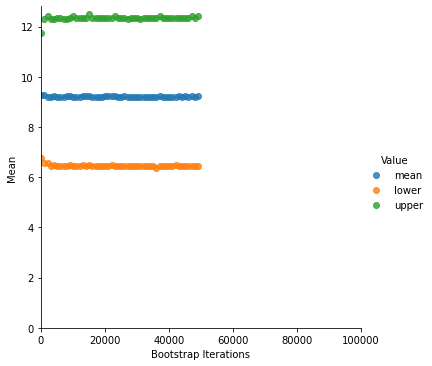

In [5]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [7]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  data_set = np.random.choice(sample,size=(n_bootstraps, sample_size))
  data_mean = np.mean(data_set)
  n_bootstraps_val = np.mean(data_set, axis=1)
  lower = np.percentile(n_bootstraps_val,(100-ci)/2)
  upper = np.percentile(n_bootstraps_val, 100-(100-ci)/2)
  return data_mean, lower, upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

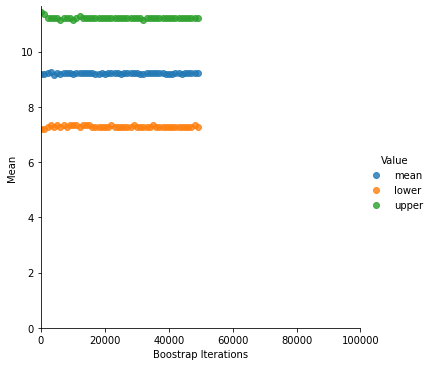

In [8]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


(array([ 5.,  5., 12.,  8., 20., 13., 11.,  3.,  0.,  2.]),
 array([18. , 20.9, 23.8, 26.7, 29.6, 32.5, 35.4, 38.3, 41.2, 44.1, 47. ]),
 <a list of 10 Patch objects>)

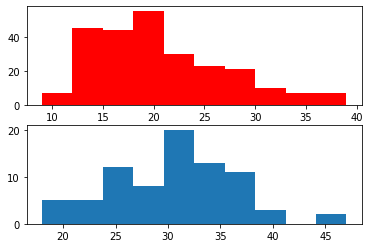

In [9]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv")
current_fleet = df['Current fleet']
new_fleet = df['New Fleet'].dropna()
plt.subplot(2,1,1)
plt.hist(current_fleet, color='r')
# Plot cumulative dist
plt.subplot(2,1,2)
plt.hist(new_fleet)
# Note: you can add more cells as needed to organise your code and your plots


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [10]:
def bootstrap_std(sample, sample_size, n_bootstraps, ci):
  data_set = np.random.choice(sample,size=(n_bootstraps, sample_size))
  data_mean = np.mean(data_set)
  n_bootstraps_val = np.std(data_set, axis=1)
  lower = np.percentile(n_bootstraps_val,(100-ci)/2)
  upper = np.percentile(n_bootstraps_val, 100-(100-ci)/2)
  return data_mean, lower, upper

In [11]:
# <---INSERT YOUR CODE HERE--->
print('Current mean = ',np.mean(df['Current fleet']))
print('New mean = ',np.mean(df['New Fleet']))
#Import data from customers.csv
customer_df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv")
df = customer_df[' Millons of pounds in sales']

##Q2
Val = bootstrap_mean_ci(df, len(df) , 10000, 95)
print("95% mean Confidence interval  = ",Val[1],Val[2])

##Q3
Val = bootstrap_mean_ci(df, len(df) , 10000, 90)
print("90% mean Confidence interval  = ",Val[1],Val[2])

##Q4
Val = bootstrap_std(df, len(df) , 10000, 85)
print("85% std Confidence interval  = ",Val[1],Val[2])

##Q5
Val = bootstrap_std(df, len(df) , 10000, 90)
print("90% std Confidence interval  = ",Val[1],Val[2])


Current mean =  20.14457831325301
New mean =  30.481012658227847
95% mean Confidence interval  =  6.428571428571429 12.285714285714286
90% mean Confidence interval  =  6.857142857142857 11.857142857142858
85% std Confidence interval  =  3.264684252007554 6.981389254179095
90% std Confidence interval  =  2.9964689587128017 7.1059762143694005


In [12]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
  t_obs = np.mean(sample2)-np.mean(sample1)
  count = 0
  concat = np.concatenate((sample1, sample2))
  for i in range (n_permutations):
    perm = np.random.permutation(concat)
    pold = perm[:int(len(perm)/2)]
    pnew = perm[int(len(perm)/2):]
    if (np.mean(pnew)-np.mean(pold))>t_obs:
      count = count +1
  pvalue = count/n_permutations
 
  return pvalue

In [13]:
permut_test(current_fleet, new_fleet, 30000)

0.0

In [16]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]
print(len(dem_share_PA))
print(len(dem_share_OH))
Val = bootstrap_mean_ci(dem_share_PA, len(dem_share_PA) , 20000, 95)
print("90% Confidence interval of PA  = ",Val[1],Val[2])
Val = bootstrap_mean_ci(dem_share_OH, len(dem_share_OH) , 20000, 90)
print("90% Confidence interval of OH  = ",Val[1],Val[2])
print("P value =",permut_test(dem_share_PA, dem_share_OH, 10000))

67
88
90% Confidence interval of PA  =  43.18894776119403 47.86330597014925
90% Confidence interval of OH  =  42.56973863636364 46.03273295454546
P value = 0.7593
